<a href="https://colab.research.google.com/github/kasettakorn/nihongo-mnist/blob/main/Japanese_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import to_categorical #One hot encoding

# Data collection & preparation

In [19]:
def load_dataset():
    # x_train = np.load("/content/kmnist/k49-train-imgs.npz")['arr_0']
    # y_train = np.load("/content/kmnist/k49-train-labels.npz")['arr_0']
    # x_test = np.load("/content/kmnist/k49-test-imgs.npz")['arr_0']
    # y_test = np.load("/content/kmnist/k49-test-labels.npz")['arr_0']
    x_train = np.load("/content/kmnist/kmnist-train-imgs.npz")['arr_0']
    y_train = np.load("/content/kmnist/kmnist-train-labels.npz")['arr_0']
    x_test = np.load("/content/kmnist/kmnist-test-imgs.npz")['arr_0']
    y_test = np.load("/content/kmnist/kmnist-test-labels.npz")['arr_0']
    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = load_dataset()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize data

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert to one hot encoding

In [21]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6000 - accuracy: 0.8108 - val_loss: 0.3054 - val_accuracy: 0.9118
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1250 - accuracy: 0.9637 - val_loss: 0.2428 - val_accuracy: 0.9327
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0765 - accuracy: 0.9768 - val_loss: 0.2064 - val_accuracy: 0.9431
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0532 - accuracy: 0.9828 - val_loss: 0.2153 - val_accuracy: 0.9450
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.2055 - val_accuracy: 0.9471
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0350 - accuracy: 0.9883 - val_loss: 0.2076 - val_accuracy: 0.9509
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.2022 - val_accuracy: 0.9525
Epoch 

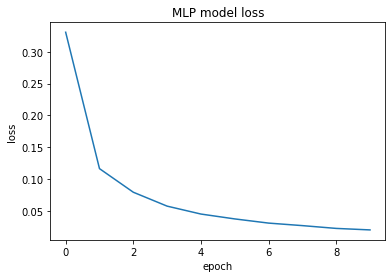

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.25, noise_shape=None))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25, noise_shape=None))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [23]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', round(train_score[1]*100, 2), "%")
print('Test loss:', test_score[0])
print('Test accuracy:', round(test_score[1]*100, 2), "%")

model.save("mnist.h5")

Train loss: 0.004242978524416685
Train accuracy: 99.88 %
Test loss: 0.21575678884983063
Test accuracy: 95.6 %


In [43]:
from PIL import Image
preds = np.argmax(model.predict(x_test), axis=-1)



60000